# Visualización de datos - Ejercicios

A lo largo de este tutorial, utilizará un conjunto de datos del mercado de valores norteamericano de 29 empresas de 2006 a 2017. Se nos pide:

1. Preparar los datasets para crear visualizaciones
2. Graficar la siguiente información:
    - Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio.
    - Precio máximo de AAPL en 2014, 2015, 2016 y 2017.
    - Distribución del volumen de transacciones por empresa para todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN.
    - Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este que corresponde a cada empresa.
    - Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio.
    
    
## Diccionario de datos

El dataset tiene las siguientes columnas:

- **Date:** fecha correspondiente al valor observado
- **Open:** Precio (en USD) al mercado abierto en la fecha especificada
- **High:** precio más alto (en USD) alcanzado durante la fecha correspondiente
- **Low:** precio más bajo (en USD) alcanzado durante la fecha correspondiente
- **Close:** Precio (en USD) al cierre del mercado en la fecha especificada
- **Volumen:** número de acciones negociadas
- **Name:** Símbolo bursátil de la empresa.


## Importar librerías y leer datos

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

## Revisiones generales

In [2]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [3]:
df.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [4]:
df.dropna()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [5]:
df.drop_duplicates().reset_index(drop=True)

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [6]:
df.info()
df.columns = df.columns.str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93612 non-null  object 
 1   Open    93587 non-null  float64
 2   High    93602 non-null  float64
 3   Low     93592 non-null  float64
 4   Close   93612 non-null  float64
 5   Volume  93612 non-null  int64  
 6   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.describe(include="all")

<ipython-input-8-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,date,open,high,low,close,volume,name
count,93612,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04,93612
unique,3020,NaN,NaN,NaN,NaN,NaN,31
top,2006-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,MMM
freq,31,NaN,NaN,NaN,NaN,NaN,3020
first,2006-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,85.623260,86.387045,84.836664,85.641753,2.015667e+07,NaN
std,NaN,108.151723,108.956365,107.225361,108.121106,3.442108e+07,NaN
min,NaN,6.750000,7.170000,0.000000,6.660000,0.000000e+00,NaN
25%,NaN,33.950000,34.290000,33.600000,33.960000,5.040180e+06,NaN


In [9]:
df.shape

(93612, 7)

In [10]:
name_mapping = {
    'AAPL': 'Apple',
    'JPM': 'JPMorgan Chase & Co',
    'GOOGL': 'GOOGLE',
    'AMZN': 'Amazon'}

## Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio

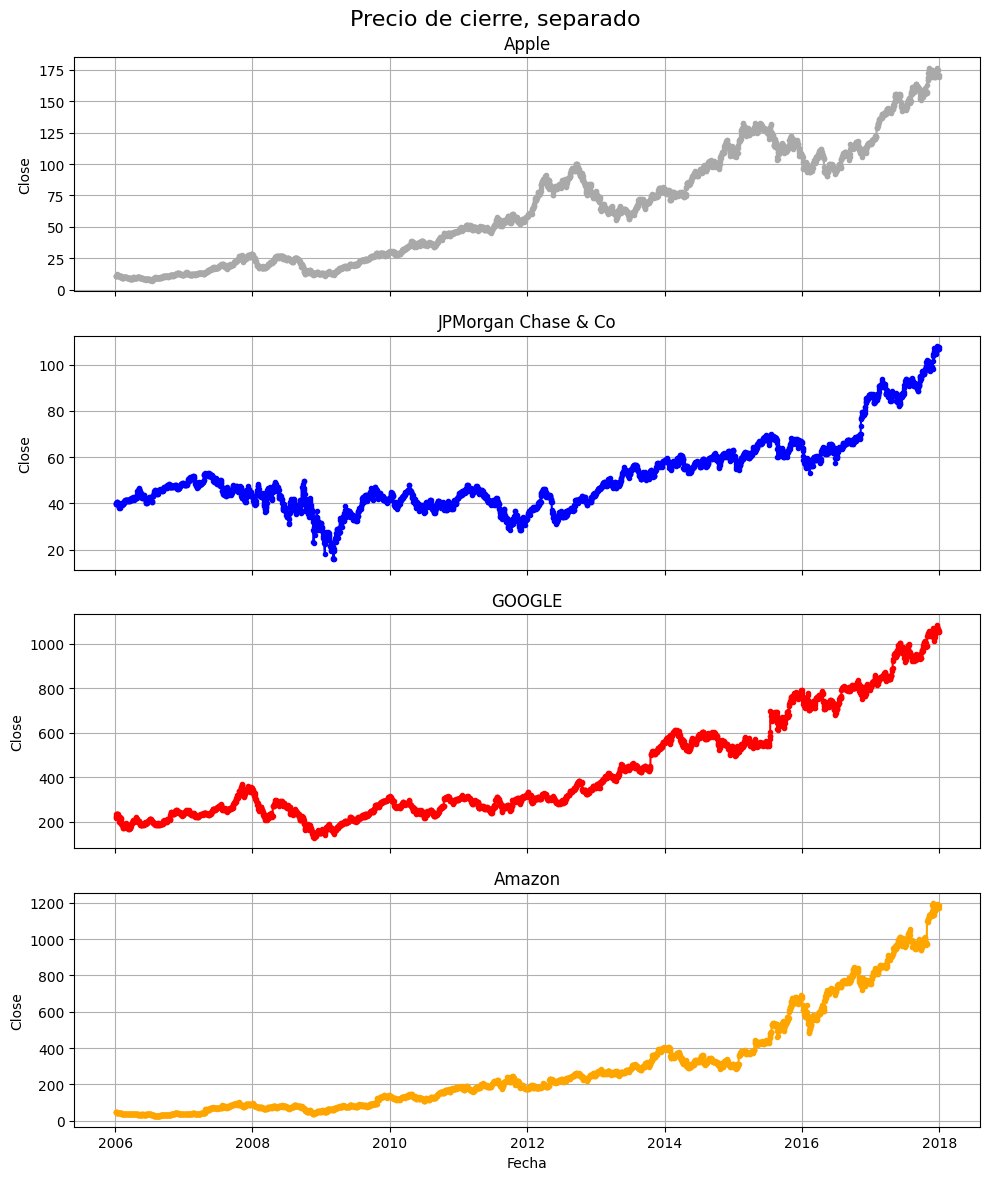

In [13]:
symbols = ['AAPL', 'JPM', 'GOOGL', 'AMZN']
filtered_df = df[df['name'].isin(symbols)]

fig, axs = plt.subplots(len(symbols), 1, figsize=(10, 12), sharex=True)

for i, symbol in enumerate(symbols):
    symbol_df = filtered_df[filtered_df['name'] == symbol]

    dates = pd.to_datetime(symbol_df['date'])
    close_values = symbol_df['close']

    axs[i].plot(dates, close_values, marker='.', linestyle='-', color=colors[symbol], label=name_mapping[symbol])
    axs[i].set_ylabel('Close')
    axs[i].set_title(name_mapping[symbol])
    axs[i].grid(True)

plt.xlabel('Fecha')
plt.suptitle('Precio de cierre, separado', fontsize=16)
plt.tight_layout()

plt.show()

In [15]:
symbols = ['AAPL', 'JPM', 'GOOGL', 'AMZN']
filtered_df = df[df['name'].isin(symbols)]

fig = px.line(filtered_df, x='date', y='close', color='name')

fig.update_traces(marker=dict(size=4), line=dict(width=2))

colors = {'AAPL': 'darkgray', 'JPM': 'blue', 'GOOGL': 'red', 'AMZN': 'orange'}

for trace in fig['data']:
    trace['line']['color'] = colors[trace['name']]
    trace['name'] = name_mapping[trace['name']]

fig.update_layout(title='Precio de cierre para todo el periodo de estudio. Conjunto.',
                  xaxis_title='Fecha',
                  yaxis_title='Close')
fig.show()

## Precio máximo de AAPL en 2014, 2015, 2016 y 2017

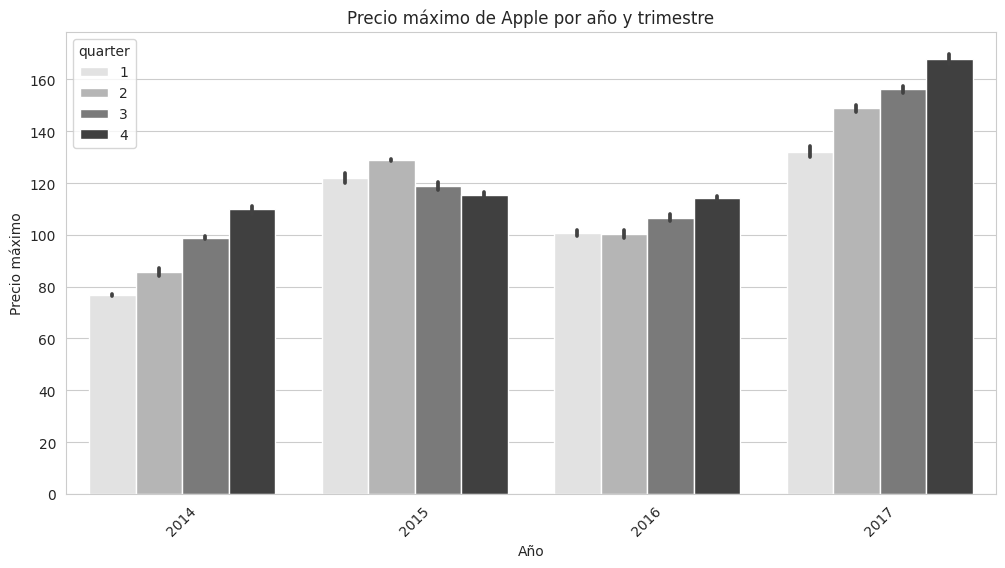

In [17]:
filtered_df = df.copy()

filtered_df = filtered_df.loc[(filtered_df['name'] == 'AAPL') & (filtered_df['date'].dt.year.isin([2014, 2015, 2016, 2017])), :]

filtered_df.loc[:, 'year'] = filtered_df['date'].dt.year
filtered_df.loc[:, 'quarter'] = filtered_df['date'].dt.quarter

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

sns.barplot(x='year', y='high', hue='quarter', data=filtered_df, palette='Greys')

plt.xlabel('Año')
plt.ylabel('Precio máximo')
plt.title('Precio máximo de Apple por año y trimestre')
plt.xticks(rotation=45)

plt.show()

## Distribución del volumen total de transacciones por empresa para todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN

In [23]:
filtered_df = df[df['name'].isin(['AAPL', 'JPM', 'GOOGL', 'AMZN'])]

fig = px.box(filtered_df, x='name', y='volume', color='name',
             color_discrete_sequence=['darkgray', 'blue', 'red', 'orange'],
             title='Distribución del volumen total de transacciones por empresa',
             labels={'name': 'Empresa', 'volume': 'Volumen'},
             width=800, height=1500)

fig.update_layout(yaxis=dict(title_standoff=20))

for trace in fig.data:
    trace.name = name_mapping[trace.name]

fig.show()

## Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este correspondiente a cada empresa.

In [30]:
filtered_df = df[df['name'].isin(['AAPL', 'JPM', 'GOOGL', 'AMZN'])].copy()
filtered_df['year'] = filtered_df['date'].dt.year
grouped_df = filtered_df.groupby(['year', 'name']).agg({'volume': 'sum'}).reset_index()
grouped_df['volume_prop'] = grouped_df.groupby('year')['volume'].transform(lambda x: x / x.sum())

fig = px.bar(grouped_df, x='year',
             y='volume',
             color='name',
             barmode='stack',
             color_discrete_sequence=['darkgray', 'orange', 'red', 'blue'],
             title='Volumen de transacciones anual por empresa',
             labels={'year': 'Año', 'volume': 'Volumen', 'name': 'Empresa'})
fig.update_xaxes(tickmode='array', tickvals=grouped_df['year'].unique(), ticktext=grouped_df['year'].unique())
fig.show()

## Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio

In [41]:
df_relacion = df[df['name'].isin(['GOOGL', 'AMZN'])].copy()

In [42]:
df_relacion['returns'] = (df_relacion['open'] - df_relacion['close']) / df_relacion['open']

In [43]:
df_relacion['name'] = df_relacion['name'].map(name_mapping)

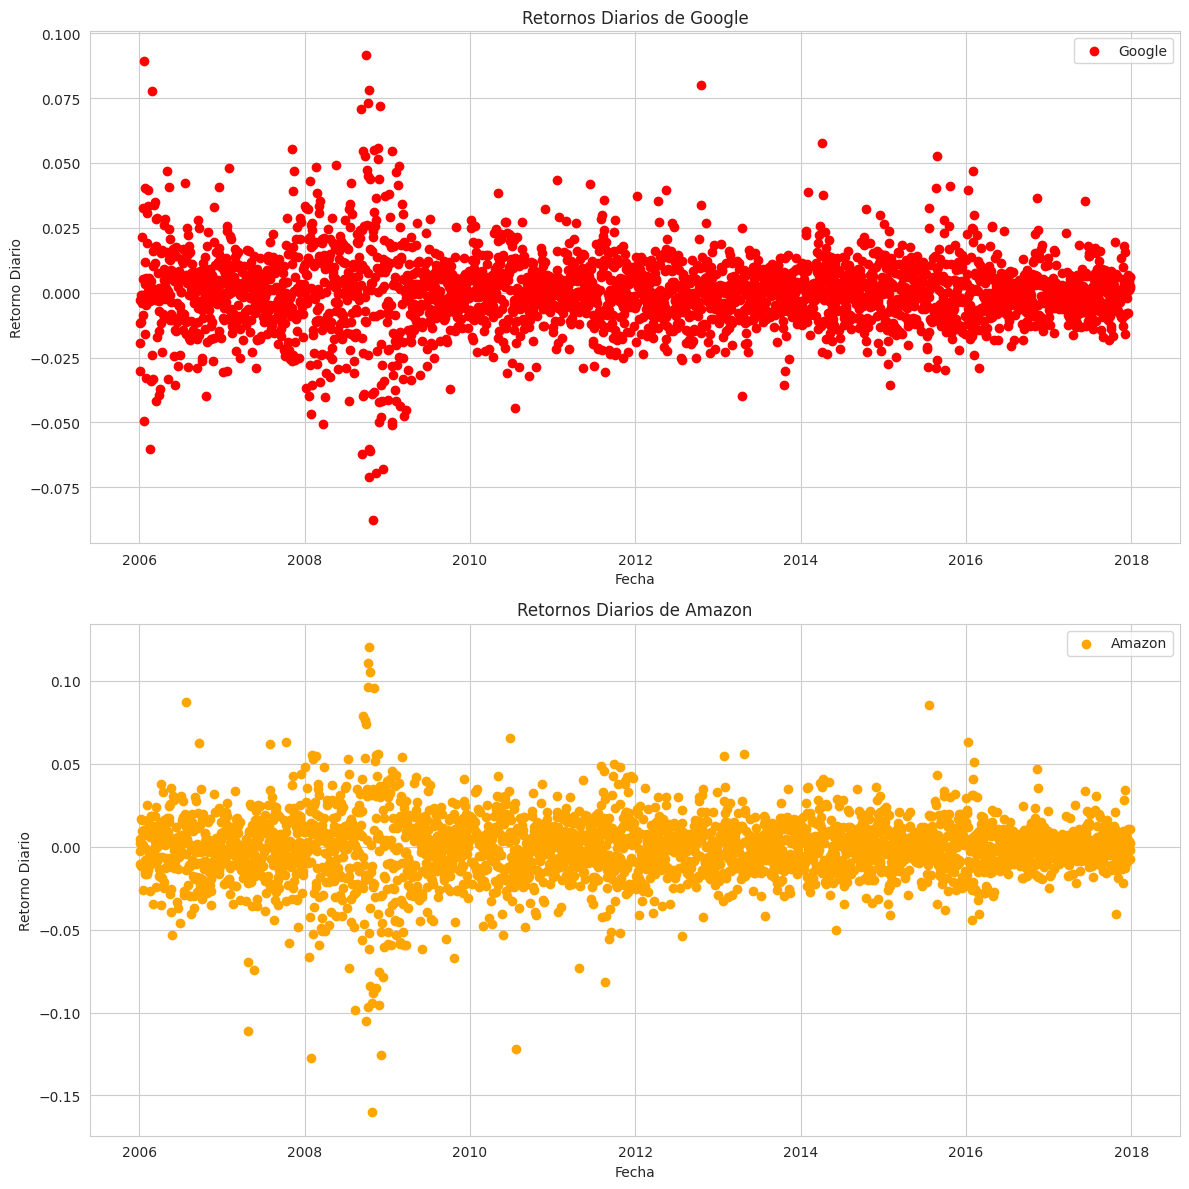

In [51]:
google_df = df_relacion[df_relacion['name'] == 'GOOGLE']
amazon_df = df_relacion[df_relacion['name'] == 'Amazon']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Gráfico de dispersión para Google
ax1.scatter(google_df['date'], google_df['returns'], label='Google', color='red', marker='o')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Retorno Diario')
ax1.set_title('Retornos Diarios de Google')
ax1.legend()
ax1.grid(True)

# Gráfico de dispersión para Amazon
ax2.scatter(amazon_df['date'], amazon_df['returns'], label='Amazon', color='orange', marker='o')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Retorno Diario')
ax2.set_title('Retornos Diarios de Amazon')
ax2.legend()
ax2.grid(True)

plt.tight_layout()  plt.show()